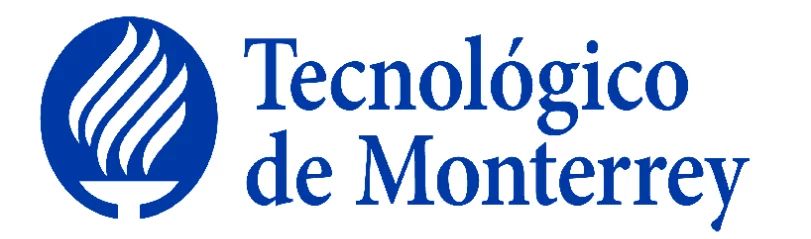

# Module 5 – Model Evaluation
###Por: Rigoberto Vega Escudero A01793132

- Over-fitting, Under-fitting and Model Selection Ridge Regression
- Grid Search And answer the Question:
- How can you be certain your model works in the real world and performs optimally.


In [1]:
#First we impor pandas
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv"
#Use the readcsv method, note here is that our data does not have column labels or headers, so we need to specify that in our module as below
df = pd.read_csv(url, header= None)

df #prints the entire dataframe (not recommended for large datasets)
#Adding a list with all the headers names that we will use
headers = ["symboling", "normalized-losses", "make","fuel-type","aspiration:","num-of-doors",
           "body-style","drive-wheels","engine-location","wheel-base","length","width","height","curb-weight",
           "engine-type","num-of-cylinders","engine-size","fuel-system","bore","stroke","compression-ratio",
           "horsepower","peak-rpm","city-mpg","highway-mpg","price"]
df.columns = headers #Code to remplace the headers name with the list elements
df


,symboling,normalized-losses,make,fuel-type,aspiration:,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [2]:
df['price'] = df['price'].str.replace('?','0') #Replacing the '?' with '0' to be able to convert it
df['price'] = df['price'].astype('int') #Here we are changing the datatype form object to integer
df['price'].dtype

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


dtype('int64')

In [3]:
df['horsepower']

0      111
1      111
2      154
3      102
4      115
      ... 
200    114
201    160
202    134
203    106
204    114
Name: horsepower, Length: 205, dtype: object

In [4]:
df['horsepower'] = df['horsepower'].str.replace('?','0') #Replacing the '?' with '0' to be able to convert it
df['horsepower'] = df['horsepower'].astype('int') #Here we are changing the datatype form object to integer
df['horsepower'].dtype

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


dtype('int64')

In [5]:
df['curb-weight'] 
df['curb-weight'] = df['curb-weight'].astype('object') 
df['curb-weight'] 

0      2548
1      2548
2      2823
3      2337
4      2824
       ... 
200    2952
201    3049
202    3012
203    3217
204    3062
Name: curb-weight, Length: 205, dtype: object

In [6]:
df['curb-weight'] = df['curb-weight'].astype(str) 
df['curb-weight'] = df['curb-weight'].str.replace('?','0') #Replacing the '?' with '0' to be able to convert it
df['curb-weight'] = df['curb-weight'].astype('int') #Here we are changing the datatype form object to integer
df['curb-weight'].dtype

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


dtype('int64')

In [7]:
df['engine-size'] = df['engine-size'].astype(str)
df['engine-size'] = df['engine-size'].str.replace('?','0') #Replacing the '?' with '0' to be able to convert it
df['engine-size'] = df['engine-size'].astype('int') #Here we are changing the datatype form object to integer
df['engine-size'].dtype

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


dtype('int64')

In [8]:
df['highway-mpg'] = df['highway-mpg'].astype(str)
df['highway-mpg'] = df['highway-mpg'].replace('?','0') #Replacing the '?' with '0' to be able to convert it
df['highway-mpg'] = df['highway-mpg'].astype('int') #Here we are changing the datatype form object to integer
df['highway-mpg'].dtype

dtype('int64')

In [9]:
X = df[['highway-mpg']]
Y = df['price']

Model Evaluation tells us how our model preforms in the real world.

In-sample evaluation tells us how well our model fits the data already given to train it.
It does not give us an estimate of how well the  rained model can predict new data.
The solution is to split our data up, use the In-sample data or training data to train the model.
The rest of the data called test data is used as out-of-sample data. This data is then used to approximate how the model performs in the real world. Separating data into training and testing sets is an important part of model evaluation. We use the test data to get an idea how our model will perform in the real world. When we split a data set, usually the larger portion of data is used for training and a smaller part is used for testing.

We use a training set to build a model and discover predictive relationships. We then use a testing set to evaluate model performance. When we have completed testing our model, we should use all the data to train the model.

# train_test_split()
A popular function in the sci-kit learn package for splitting datasets is the "train test split" function.
This function randomly splits a dataset into training and testing subsets.


In [ ]:
#try the code
from sklearn.model_selection import train_test_split
#this code will part the dataset in two sets a train and a test, where we will assign 70% to train and 30% test
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

##Cross Validation

One of the most common out-of-sample evaluation metrics is cross-validation.
In this method, the dataset is split into k-equal groups; each group is referred to as a fold.
For example 4 folds. Some of the folds can be used as a training set, which we use to train the model, and the remaining parts are used as a test set, which we use to test the model.

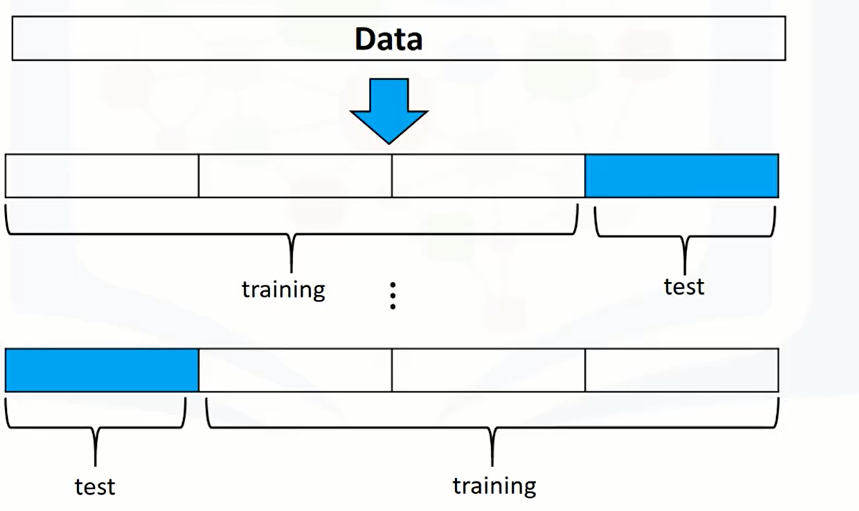

#cross_val_score()
The Simplest way to apply cross validation is to call the cross_val_score() function, which performs multiple 'out-of-sample' evaluations.

In [11]:
#try the code
from sklearn.linear_model import LinearRegression #Import the library
lr = LinearRegression()
from sklearn.model_selection import cross_val_score
#here we will test the Linear regression model with a partition of 3 partitions which we we evaluate the model to check its performance
scores = cross_val_score (lr, X, Y, cv = 3)
scores

array([0.47407352, 0.45193686, 0.05422688])

#cross_val_predict()
To do this, we use the cross_val_predict() function.
The input parameters are exactly the same as the cross_val_score() function, but the output is a prediction.

In [12]:
#try the code
from sklearn.linear_model import LinearRegression #Import the library
lr = LinearRegression()
from sklearn.model_selection import cross_val_predict
#here we will test the Linear regression model with a partition of 3 partitions which we we evaluate the model to check its performance
scores = cross_val_predict (lr, X, Y, cv = 3)
scores

array([15654.89099443, 15654.89099443, 16463.34250221, 13229.53647109,
       19697.14853333, 17271.79400999, 17271.79400999, 17271.79400999,
       21314.05154888, 19697.14853333, 14037.98797887, 14037.98797887,
       14846.43948665, 14846.43948665, 17271.79400999, 19697.14853333,
       19697.14853333, 21314.05154888, -5364.84820785,  2719.66686995,
        2719.66686995,  4336.56988551,  6761.92440885, 13229.53647109,
        6761.92440885,  6761.92440885,  6761.92440885, 13229.53647109,
       13229.53647109, 18080.24551777, -6173.29971562,  6761.92440885,
        3528.11837773,  9995.73043997,  9995.73043997,  9995.73043997,
        9995.73043997, 10804.18194775, 10804.18194775, 10804.18194775,
       10804.18194775, 14846.43948665, 12421.08496331, 14037.98797887,
        2719.66686995,  2719.66686995, 14037.98797887, 22122.50305666,
       22122.50305666, 23739.40607222, 12421.08496331,  6761.92440885,
        6761.92440885,  6761.92440885,  6761.92440885, 18888.69702555,
      

##Overfitting, Underfitting

#Underfitting

If we try and fit the function with a linear function, the line is not complex enough to fit the data. As a result, there are many errors. This is called under-fitting, where the model is too simple to fit the data.

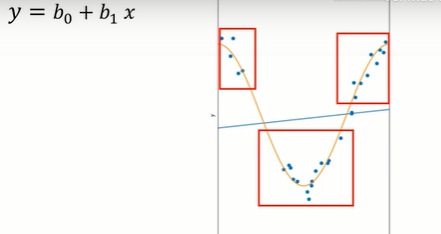

#Overfititng

Increasing it to a 16th order polynomial, the model does extremely well at tracking the training points, but performs poorly at estimating the function.
This is especially apparent where there is little training data; the estimated function oscillates not tracking the function. This is called over-fitting, where the model is too flexible and fits the noise rather than the function.

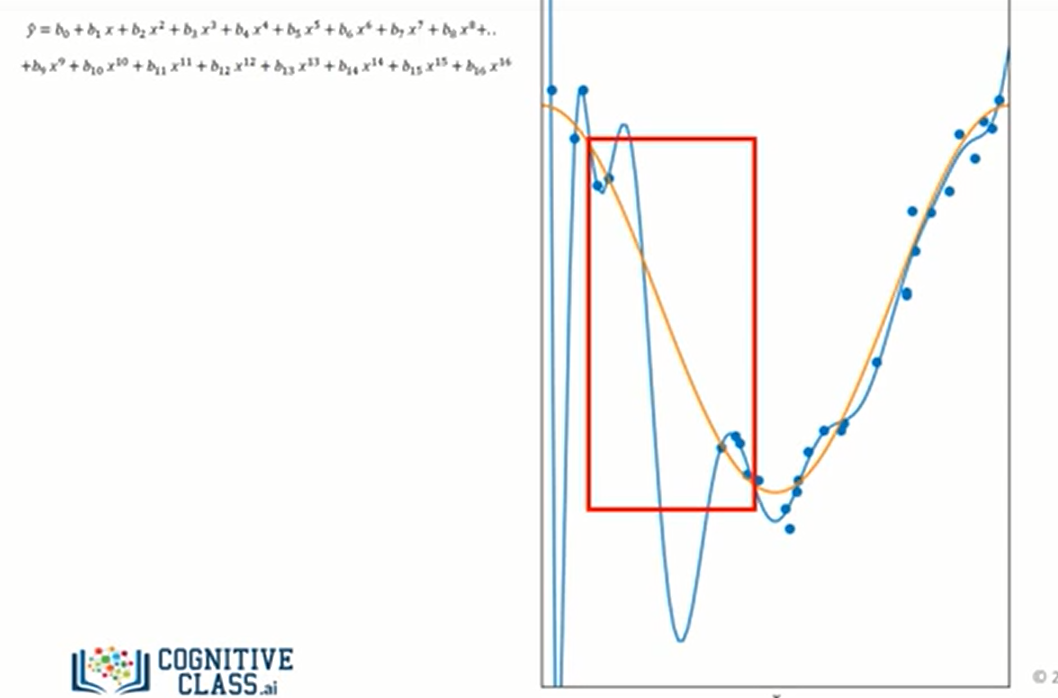

The test error is a better means of estimating the error of a polynomial. The error decreases till the best order of the polynomial is determined, then the error begins to increase. We select the order that minimizes the test error, in this case, it was 8.
Anything on the left would be considered under-fitting. Anything on the right is over-fitting.

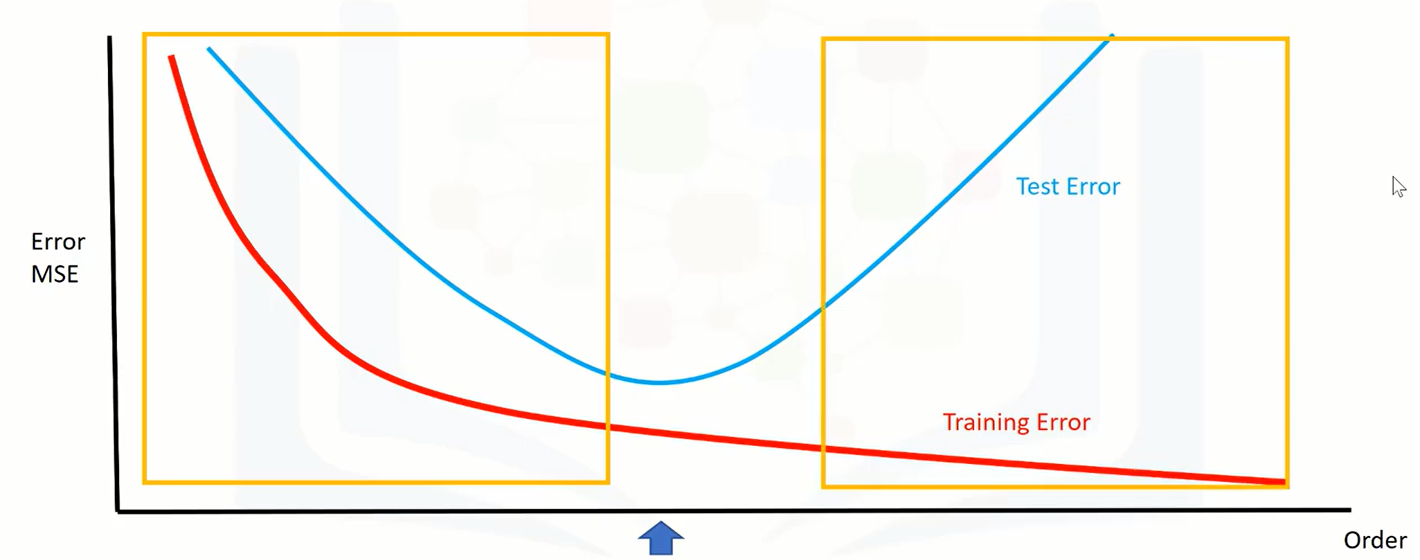

##Ridge Regression

Ridge regression prevents over-fitting.

Ridge regression controls the magnitude of these polynomial coefficients by introducing the parameter alpha. Alpha is a parameter we select before fitting or training the model. Each row in the following table represents an increasing value of alpha.

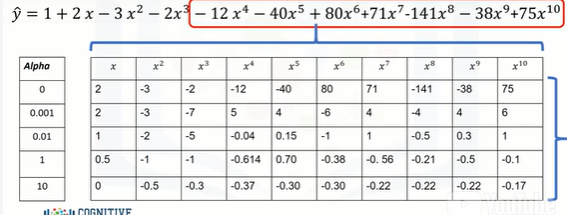

As alpha increases, the parameters get smaller.
This is most evident for the higher order polynomial features, but alpha must be selected carefully.
If alpha is too large, the coefficients will approach zero and under-fit the data. If alpha is zero, the over-fitting is evident. For alpha equal to 0.001, the over fitting begins to subside. For alpha equal to 0.01, the estimated function tracks the actual function. When alpha equals 1, we see the first signs of under-fitting.

In [ ]:
#Try the code

from sklearn.linear_model import Ridge
#here we will evaluate the model using an alpha value of 0.1 
RidgeModel = Ridge(alpha = 0.1)
RidgeModel.fit(X,Y)

yhat = RidgeModel.predict(X)

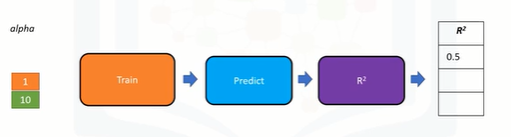

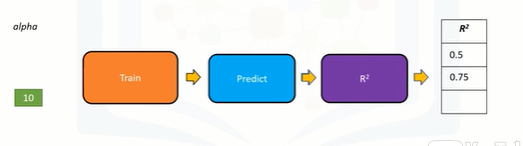

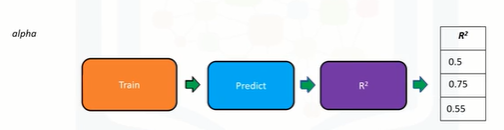

We start with a small value of alpha, we train the model, make a prediction using the validation data, then calculate the R squared and store the values.

We train the model again, make a prediction using the validation data, then calculate the R squared and store the values of R squared.

We select the value of alpha that maximizes the R squared.

#Grid Search 



Grid search allows us to scan through multiple free parameters with few lines of code. Parameters like the alpha term discussed in the previous video are not part of the fitting or training process. These values are called hyperparameters.

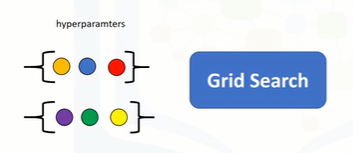

To select the hyperparameter, we split our dataset into three parts, the training set, validation set, and test set. We train the model for different hyperparameters. We use the R squared or mean square error for each model. We select the hyperparameter that minimizes the mean squared error or maximizes the R squared on the validation set.

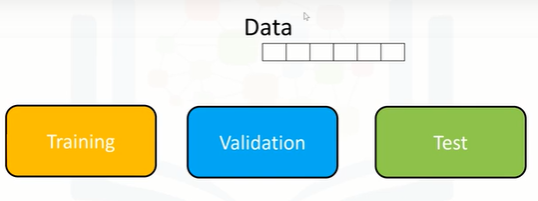

In [ ]:
#try the code

#the hyperparamerts are in dictionaries to be tested for the grid search

parameterts = {'alpha':[1,10,100,1000]}

The grid search takes on the scoring method, in this case R squared, the number of folds, the model or object, and the free parameter values.

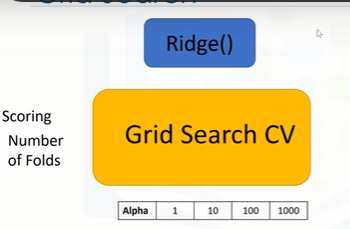

In [17]:
X

,highway-mpg
0,27
1,27
2,26
3,30
4,22
...,...
200,28
201,25
202,23
203,27


In [21]:
#try the code

from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

parameterts = {'alpha':[0.0001,0.1,1,10,100,1000,1000000,10000000]}
#Here we will obtain the hyperparameters for our ridge model to get the best values to work with our model
RR = Ridge()
grid1 = GridSearchCV(RR, parameterts, cv=4)

grid1.fit(df[['highway-mpg','curb-weight','engine-size','highway-mpg']],Y)

grid1.best_estimator_
scores = grid1.cv_results_
scores['mean_test_score']



array([0.63359004, 0.63359059, 0.63359552, 0.63364462, 0.6341195 ,
       0.63760854, 0.54874646, 0.53608312])

In [23]:
#try the code

from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

parameterts = {'alpha':[0.0001,0.1,1,10,100], 'normalize':[True, False]}
#Here we will obtain the hyperparameters for our ridge model to get the best values to work with our model
RR = Ridge()
grid1 = GridSearchCV(RR, parameterts, cv=4)

grid1.fit(df[['highway-mpg','curb-weight','engine-size','highway-mpg']],Y)

grid1.best_estimator_
scores = grid1.cv_results_
scores['mean_test_score']

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipel

array([0.63363017, 0.63359004, 0.65047128, 0.63359059, 0.61906301,
       0.63359552, 0.28537553, 0.63364462, 0.02066767, 0.6341195 ])

Labs completed

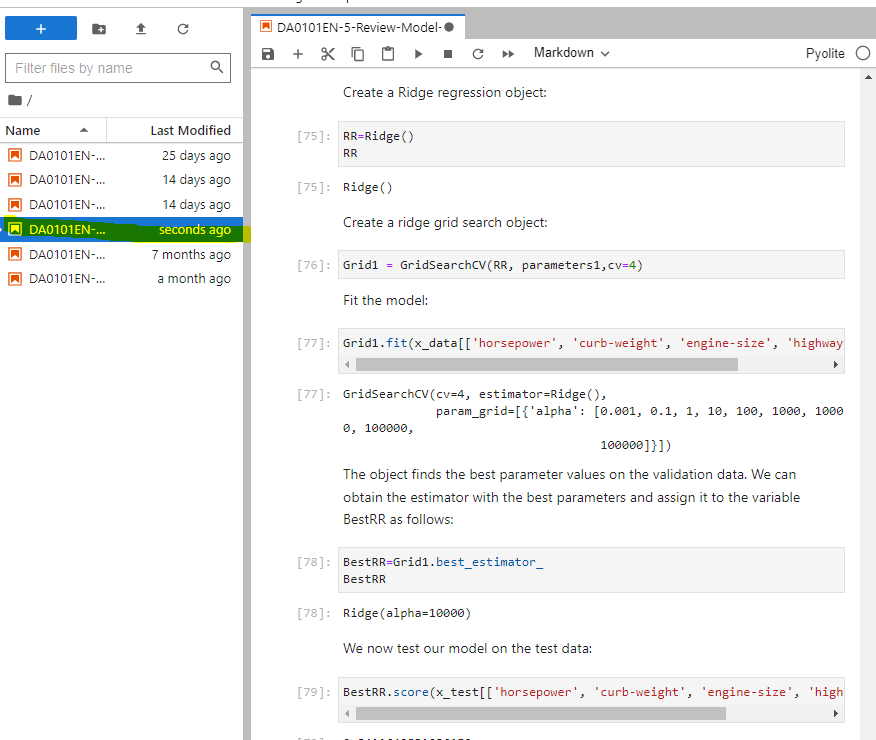